# Исследование объявлений о продаже квартир

В данной работе нужно выстроить систему определения рыночной стоимости объектов недвижимости на основе данных сервиса Яндекс.Недвижимость, установив соответствующие параметры. Преимущественно освоены инструменты визуализации данных библиотеки matplotlib.



### Шаг 1. Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
print(data.head(10))
print()
print(data.info())
print(data.describe())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

### Вывод

Открыли файл с данными, добавили знак табуляции для разделеня слипшихся столбцов и лучшей визуализации. Обнаружили пропущенные значения в некоторых столбцах, изучили структуру данных.

In [3]:
#Найдем и обработаем пропуски в данных
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [4]:
data['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [5]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [6]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [7]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [8]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [9]:
data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [10]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [11]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [12]:
data['studio'].unique()

array([False,  True])

In [13]:
data['open_plan'].unique()

array([False,  True])

In [14]:
data['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

In [15]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
data['airports_nearest'].unique()

array([18863., 12817., 21741., ..., 11751., 20151., 24665.])

In [18]:
data['cityCenters_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

In [19]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [20]:
data['parks_nearest'].unique()

array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 3.100e+02,
       2.940e+02, 5.900e+02, 4.200e+02, 7.590e+02, 2.480e+02, 5.170e+02,
       4.110e+02, 4.520e+02, 5.320e+02, 4.590e+02, 7.250e+02, 4.700e+01,
       6.200e+02, 6.750e+02, 5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02,
       6.480e+02, 3.820e+02, 3.340e+02, 1.670e+02, 4.450e+02, 2.310e+02,
       5.110e+02, 7.510e+02, 6.660e+02, 3.840e+02, 1.270e+02, 2.410e+02,
       4.880e+02, 1.560e+02, 5.760e+02, 2.850e+02, 6.330e+02, 1.500e+01,
       2.150e+02, 5.330e+02, 1.410e+02, 3.660e+02, 3.410e+02, 5.890e+02,
       3.440e+02, 5.080e+02, 4.170e+02, 7.620e+02, 4.410e+02, 5.590e+02,
       7.490e+02, 1.230e+02, 5.010e+02, 1.000e+01, 1.133e+03, 1.205e+03,
       5.160e+02, 8.600e+02, 2.760e+02, 9.800e+02, 4.630e+02, 5.910e+02,
       2.390e+02, 6.510e+02, 1.021e+03, 4.850e+02, 5.860e+02, 3.700e+02,
       6.880e+02, 2.750e+02, 5.460e+02, 4.660e+02, 1.390e+02, 2.510e+02,
       5.370e+02, 6.270e+02, 1.040e+02, 4.500e+02, 

In [21]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [22]:
data['ponds_nearest'].unique()

array([ 755.,   nan,  574., ...,  959.,   40., 1134.])

In [23]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

In [24]:
for row in data:
    print(data[row].unique())

[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
[108.    40.4   56.   ...  66.86 133.81  76.75]
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35

In [25]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим, что пропуски есть во многих столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, ... итд. Рассмотрим, почему могли появиться пропуски и нужно ли с этим что-то делать:
1) ceiling_height - данные по этому параметру могут быть не указаны, либо указаны с ошибкой, заменим пропущенные данные на среднее значение этого параметра.
2) floors_total - узнать точное кол-во этажей в доме мы не можем, поэтому пропуски можно удалить.
3) living_area и kitchen_area - на средние
4) balcony - данные не указаны, наверное потому, что балкона нет совем, заменим на 0.
5) locality_name - пропуски лучше удалить, они никак не повлияют на данные.
6) airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - оставить без изменения.
7) days_exposition - заменить на среднее значение.

In [26]:
#здесь найдем и посчитаем пропуски в столбцах, оценим сами данные
for row in data:
    print(data[row].value_counts())

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64
2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111

In [27]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [228]:
#заполним пропуски в столбцах ceiling_height, living_area и kitchen_area, days_exposition на средние значения
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value = ceiling_height_median)
print(data['ceiling_height'])

living_area_mean = data['living_area'].mean()
data['living_area'] = data['living_area'].fillna(value = living_area_mean)
print(data['living_area'])

kitchen_area_mean = data['kitchen_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(value = kitchen_area_mean)
print(data['kitchen_area'])

cityCenters_nearest_mean = data['cityCenters_nearest'].mean()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value = cityCenters_nearest_mean)
print(data['cityCenters_nearest'])

days_exposition_mean = data['days_exposition'].mean()
data['days_exposition'] = data['days_exposition'].fillna(value = days_exposition_mean)
print(data['days_exposition'])


0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64
0        51.000000
1        18.600000
2        34.300000
3        34.457852
4        32.000000
           ...    
23694    73.300000
23695    38.000000
23696    29.700000
23697    34.457852
23698    12.300000
Name: living_area, Length: 23699, dtype: float64
0        25.000000
1        11.000000
2         8.300000
3        10.569807
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696    10.569807
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23699, dtype: float64
0        16028.000000
1        18603.000000
2        13933.000000
3         6800.000000
4         8098.000000
             ...     
23694     4232.000000
23695    14191.277833
23696    14191.277833
23697    10364.000000
23698    14191.277833
Name: cityCenters_nearest, Length: 

In [229]:
#заменим пропуски в столбце balcony на 0
data['balcony'] = data['balcony'].fillna(value = 0)
print(data['balcony'])

0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    2.0
23698    0.0
Name: balcony, Length: 23699, dtype: float64


In [230]:
#удалим пропуски в стобцах floors_total и locality_name
data.dropna(subset = ['floors_total'], inplace=True)
data.dropna(subset = ['locality_name'], inplace=True)
data.dropna(subset = ['last_price'], inplace=True)

In [231]:
#заменим тип данных в столбце с датой методом .to_datetime()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'])
#заменим тип данных в столбцах balcony, floors_total, days_exposition
data['balcony'] = pd.to_numeric(data['balcony'], errors = 'coerce')
data['floors_total'] = pd.to_numeric(data['floors_total'], errors = 'coerce')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors = 'coerce')
print(data['balcony'])
print(data['floors_total'])
print(data['days_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]
0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    2.0
23698    0.0
Name: balcony, Length: 23565, dtype: float64
0        16.0
1        11.0
2         5.0
3        14.0
4        14.0
         ... 
23694     5.0
23695     5.0
23696     3.0
23697    17.0
23698     5.0
Name: floors_total, Length: 23565, dtype: float64
0        180.888634
1         81.000000
2        558.000000
3        424.000000
4        121.000000
            ...    
23694    180.888634
23695     45.000000
23696    180.888634
23697    602.000000
23698    180.888634
Name: days_exposition, Length: 23565, dtype: float64


Заменили типы данных на дату и на целочисленные потому, что столбцы с датой должны иметь формат дата, а столбцы с кол-вом балконов, кол-вом этажей и днями на продаже должны быть целыми числами.

### Шаг 3. Подсчет и добавление данных  в таблицу

In [232]:
#рассчет ценв квадратного метра
data['price_square_meter'] = data['last_price'] / data['total_area']

In [233]:
#рассчет дня недели, месяц и год публикации объявления
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [234]:
#рассчет этажа квартир(категоризация по этажам)

def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#добавляем столбец с категориями этажей к датафрейму
data['floor_type'] = data.apply(floor_category, axis=1)
data['floor_type'].value_counts()



другой       17326
последний     3330
первый        2909
Name: floor_type, dtype: int64

In [235]:
#рассчет соотношение жилой и общей площади, а также отношение площади кухни к общей и добавила эти столбцы с рассчетами в таблицу
data['total_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
print(data['total_area_ratio'])
print(data['kitchen_area_ratio'])
print(data.head(10))

0        0.472222
1        0.460396
2        0.612500
3        0.216716
4        0.320000
           ...   
23694    0.547792
23695    0.644068
23696    0.523810
23697    0.448962
23698    0.380805
Name: total_area_ratio, Length: 23565, dtype: float64
0        0.231481
1        0.272277
2        0.148214
3        0.066477
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696    0.186416
23697    0.303583
23698    0.278638
Name: kitchen_area_ratio, Length: 23565, dtype: float64
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00           2019-03-07      3   
1             7   3350000.0       40.40           2018-12-04      1   
2            10   5196000.0       56.00           2015-08-20      2   
3             0  64900000.0      159.00           2015-07-24      3   
4             2  10000000.0      100.00           2018-06-19      2   
5            10   2890000.0       30.40           2018-09-10      1 

### Шаг 4. Проведение исследовательского анализа данных:

### Изучение параметров

In [236]:
#изучим параметр площадь
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

(0, 150)

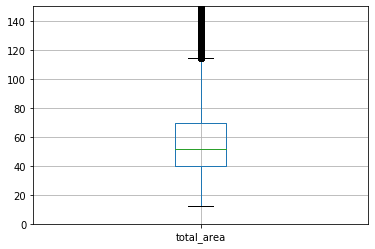

In [237]:
data.boxplot('total_area')
plt.ylim(0, 150)

Большинство значений находятся в диапазоне от 40 до 70, что характерно для кварти. Минимальное значение(нижняя граница ящика с усами) находится на 12, а верхняя на 115. Значит для гистограммы зададим такой диапазон.

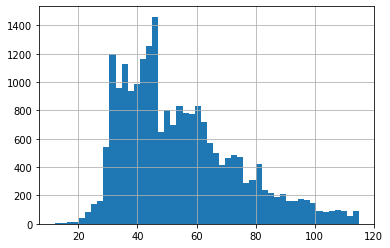

In [238]:

#гпафик после отброса выбросов
total_area_query = data.query('total_area >= 12 and total_area <= 115')
total_area_query['total_area'].hist(bins=50)

In [239]:
#изучим цену
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

(0, 15646000.0)

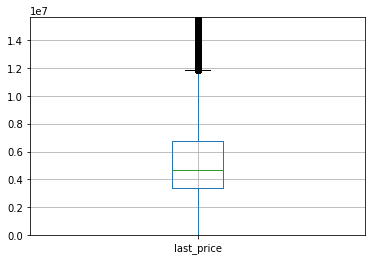

In [240]:
data.boxplot('last_price')
plt.ylim(0, 15.646000e+06)

In [241]:
#посмотрим на данные с минимальной ценой за квартиру
min_price = data.query('last_price < 5.219000e+05')
min_price.sort_values('last_price').head(15)[['last_price', 'total_area']]

,last_price,total_area
8793,12190.0,109.0
14911,430000.0,54.0
17456,430000.0,30.4
16274,440000.0,40.0
5698,450000.0,42.0
9581,450000.0,43.4
17676,450000.0,36.5
16219,450000.0,38.5
21912,470000.0,37.0
18867,470000.0,41.0


Видим, что верхняя граница ящика с усами находится на границе 12e+06 (12 000 000), значит это и будт заданным диапазоном для гистограммы. Но минимальное значение в столбце странное 12 190,это слишком мало. Вывела для самых маленьких значений цены и площадь и стало ясно, что 12190 это выброс, а на самом деле нормальная минимальная стоимость это 430 000, этим и ограничим гистограмму со стороны минимального значения. 

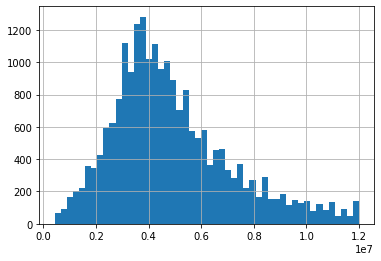

In [242]:
#данные вместе с выбросами
#data.query('last_price <= 12e+06')['last_price'].hist(bins=50)
#данные без выбросов
last_price_query = data.query('last_price >= 4.3e+05 and last_price <= 12e+06')
last_price_query['last_price'].hist(bins=50)

In [243]:
#изучим число комнат
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

(0, 6)

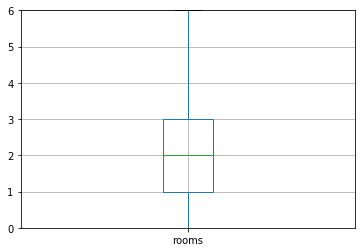

In [244]:
data.boxplot('rooms')
plt.ylim(0, 6)

Обычное число комнат это от 1 до 6, в данных присутствуют данные мин - 0 и макс - 19, определим их как выбросы и построим даграмму ящика с усами. По ней видно, что основной диапазон кол-ва комнат это 1-3 (похоже на правду)

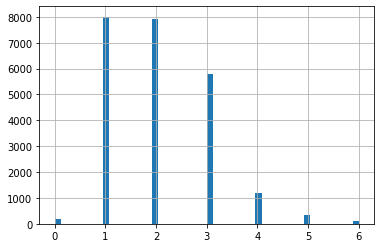

In [245]:
rooms_query = data.query('rooms >= 0 and rooms <= 6')
rooms_query['rooms'].hist(bins=50)

видно, что квартир с 0 комнат очень мало, однозначно студий гораздо больше и я дкмаю, что многие находятся в столбце с 1 комнатой ( ну я так рассуждала во всяком случае)

In [246]:
#изучим высоту потолков в квартирах
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

(2, 3.5)

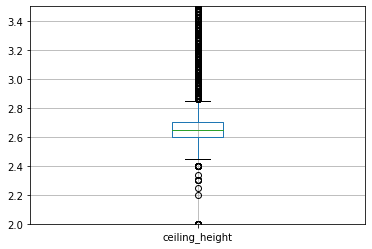

In [247]:
data.boxplot('ceiling_height')
plt.ylim(2, 3.5)

По диаграмме видно, что диапазон значения высоты потолка от 2.4 до 3.0 метров

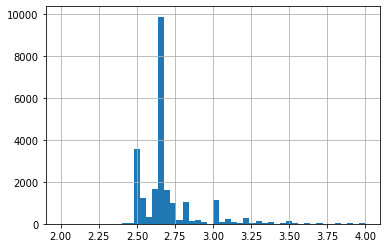

In [248]:
ceiling_height_query = data.query('ceiling_height >= 2 and ceiling_height <= 4')
ceiling_height_query['ceiling_height'].hist(bins=50)

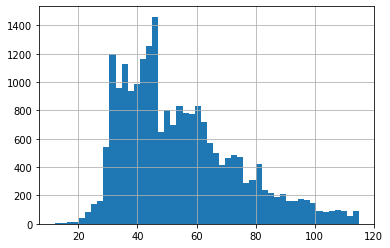

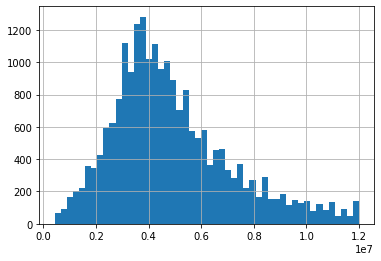

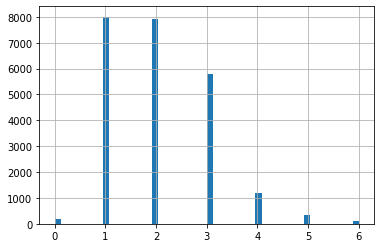

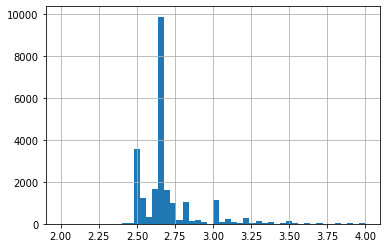

In [249]:
col_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
query_list = [total_area_query, last_price_query, rooms_query, ceiling_height_query]
for query, column in zip(query_list, col_list):
    query[column].hist(bins=50)
    plt.show()
#создали два списка, со столбцами и с переменными, в которых хранятся срезы из этих столбцов 
#и прошлись по ним одновременно, графики строятся автоматически     

### "Изучение времени продажи квартиры"

In [250]:
data['days_exposition'].describe()

count    23565.000000
mean       180.761208
std        204.414134
min          1.000000
25%         45.000000
50%        124.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

(-10, 500)

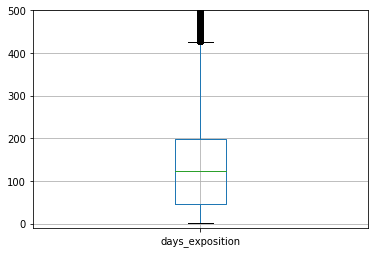

In [251]:
data.boxplot('days_exposition')
plt.ylim(-10, 500)

Видим, что диапазон значения находится в промежутке от 0 до 430 дней

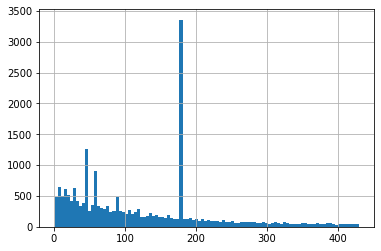

In [252]:
data.query('days_exposition >= 0 and days_exposition <= 430')['days_exposition'].hist(bins=100)
#заметно, что самым частым временем экспозиции квартиры являктся примерно 180 дней

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

А вот и пик, связанный с заполнением пропусков, который сильно влияет на статистические показатели. 

</div>

In [253]:
data['days_exposition'].median()
#ищем медиану

124.0

In [254]:
data['days_exposition'].mean()
#ищем среднее

180.76120770577995

В среднем можно считать, что продажи за 3-6 месяцев - нормальные. Осторожно следует отнеститсь к сроками около месяца, что слишком быстро, потому что может быть связано с мошенничеством на недвижимости. Аномально долгие продажи могут быть из-за высокой цены, плохого расположения или доп. сложностями с документами - это все квртиры, котрые потребовали более 6 месяцев на продажу.

### "Какие факторы больше всего влияют на стоимость квартиры?"

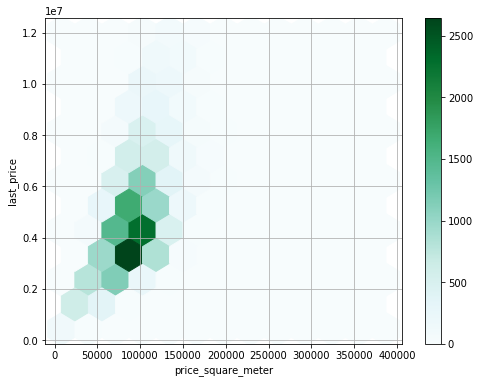

In [255]:

price_query = data.query('total_area >= 12 and total_area <= 115 and last_price >= 4.3e+05 and last_price <= 12e+06')
price_query.plot(x='price_square_meter', y='last_price',  kind='hexbin', gridsize=12, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [256]:
price_area_query['price_square_meter'].corr(price_area_query['last_price'])

0.6319150743351037

цена растет пропорционально увеличению площади жилья, плюс коэфф корр. 0.6

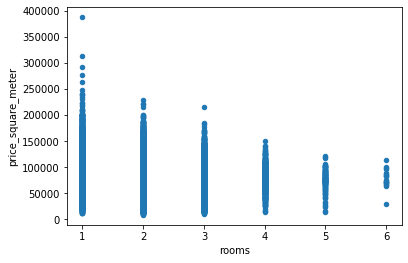

In [257]:
#зависимость кол-ва комнат от цены
rooms_price_query = data.query('rooms >= 1 and rooms <= 6 and last_price >= 4.3e+05 and last_price <= 12e+06')
rooms_price_query.plot(x='rooms', y='price_square_meter', kind='scatter')
plt.show()

In [258]:
rooms_price_query['price_square_meter'].corr(rooms_price_query['rooms'])

-0.22487345880823514

с увеличением кол-ва комнат в квартире меньше цена за кв. метр? по графику так плюс к этому кофф корреляции -0.22, что говорит о том, что с увеличением одного параметра, уменьшается другой

In [259]:
#зависимость от этажа
data[['floor_type', 'last_price']].query('last_price >= 4.3e+05 and last_price <= 12e+06').pivot_table(index='floor_type', values='last_price')

,last_price
floor_type,
другой,5.069338e+06
первый,4.162265e+06
последний,4.532461e+06


видно, что первый или последний этаж стоит дешевле, при том первый дешевле всех

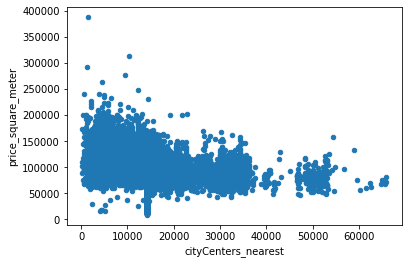

In [260]:
#зависимость от удаленности от центра
data.query('last_price >= 4.3e+05 and last_price <= 12e+06').plot(x='cityCenters_nearest', y='price_square_meter', kind='scatter')
plt.show()

In [261]:
data.query('last_price >= 4.3e+05 and last_price <= 12e+06')['price_square_meter'].corr(data.query('last_price >= 4.3e+05 and last_price <= 12e+06')['cityCenters_nearest'])

-0.2436749203663976

квартиры, удаленные от центра стоят дешевле

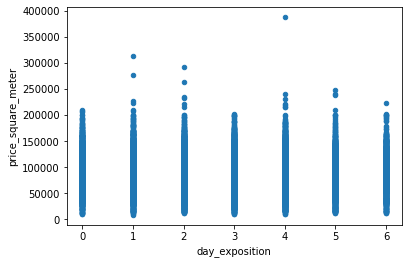

In [262]:
#зависимость от дня 
data.query('last_price >= 4.3e+05 and last_price <= 12e+06').plot(x='day_exposition', y='price_square_meter', kind='scatter')
plt.show()

In [263]:
data.query('last_price >= 4.3e+05 and last_price <= 12e+06')['day_exposition'].corr(data.query('last_price >= 4.3e+05 and last_price <= 12e+06')['price_square_meter'])

-0.009986477077681728

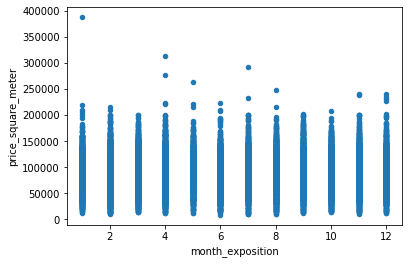

In [264]:
#зависимость от месяца
data.query('last_price >= 4.3e+05 and last_price <= 12e+06').plot(x='month_exposition', y='price_square_meter', kind='scatter')
plt.show()

In [265]:
data.query('last_price >= 4.3e+05 and last_price <= 12e+06')['month_exposition'].corr(data.query('last_price >= 4.3e+05 and last_price <= 12e+06')['price_square_meter'])

-0.0021284260171289594

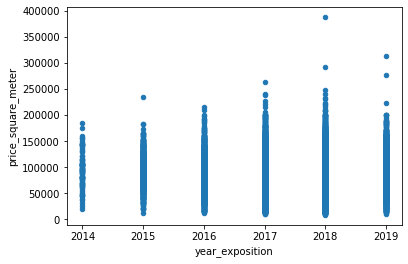

In [266]:
#зависимость от года
data.query('last_price >= 4.3e+05 and last_price <= 12e+06').plot(x='year_exposition', y='price_square_meter', kind='scatter')
plt.show()

In [267]:
data.query('last_price >= 4.3e+05 and last_price <= 12e+06')['year_exposition'].corr(data.query('last_price >= 4.3e+05 and last_price <= 12e+06')['price_square_meter'])

0.07345977590792226

особой зависимости цены от дня, месяца и года публикации не наблюдается, исключение толко 2014 год, когда публикаций было меньше и цены на квартире были тоже ниже

In [268]:
#выделим 10 населенных пунктов где больше всего объявлений, расположив их по убыванию
#
median_price_square_meter = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'median'])
median_price_square_meter.columns = ['count', 'median']
median_price_square_meter.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15651,104774.535809
посёлок Мурино,520,85878.462169
посёлок Шушары,439,76829.268293
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
посёлок Парголово,327,91642.857143
Гатчина,307,67796.610169
деревня Кудрово,299,91860.465116


In [269]:
#средняя цена квадратного метра в населенных пунктах
print(median_price_square_meter.sort_values('count', ascending=False).head(10))

                   count         median
locality_name                          
Санкт-Петербург    15651  104774.535809
посёлок Мурино       520   85878.462169
посёлок Шушары       439   76829.268293
Всеволожск           398   65789.473684
Пушкин               369  100000.000000
Колпино              338   74723.748474
посёлок Парголово    327   91642.857143
Гатчина              307   67796.610169
деревня Кудрово      299   91860.465116
Выборг               237   58158.319871


In [270]:
data.query('last_price >= 4.3e+05 and last_price <= 12e+06').pivot_table(index='locality_name', values='price_square_meter').sort_values(by='price_square_meter', ascending=False)
       

,price_square_meter
locality_name,
посёлок Лисий Нос,121616.221359
Санкт-Петербург,105639.662681
Зеленогорск,100636.523580
Пушкин,100322.823868
Кудрово,99780.035133
...,...
поселок Совхозный,12629.129129
деревня Выскатка,12335.480902
деревня Вахнова Кара,11688.311688


видно, что самая дорогая недвижимость в поселке лисий нос, а самая дешевая в деревне Старополье

### "Изучение предложения квартир: выяснение, какая область входит в центр."

In [271]:
#найдем все квартиры в питере
spb = pd.DataFrame(data.loc[data['locality_name'] == 'Санкт-Петербург'])
spb.reset_index()
#print(spb.head(10))

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_exposition,month_exposition,year_exposition,floor_type,total_area_ratio,kitchen_area_ratio
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,...,2.0,755.0,180.888634,120370.370370,3,3,2019,другой,0.472222,0.231481
1,2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,...,2.0,574.0,558.000000,92785.714286,3,8,2015,другой,0.612500,0.148214
2,3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,34.457852,9,...,3.0,234.0,424.000000,408176.100629,4,7,2015,другой,0.216716,0.066477
3,4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,...,1.0,48.0,121.000000,100000.000000,1,6,2018,другой,0.320000,0.410000
4,7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,34.457852,22,...,0.0,NaN,180.888634,110544.692737,3,4,2019,другой,0.481255,0.263966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15646,23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.300000,4,...,2.0,652.0,29.000000,100566.572238,2,2,2018,другой,0.461756,0.257790
15647,23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.000000,2,...,0.0,NaN,15.000000,105769.230769,3,7,2018,другой,0.596154,0.115385
15648,23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,...,1.0,806.0,519.000000,129903.978052,3,10,2016,другой,0.552812,0.145405
15649,23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,...,3.0,381.0,180.888634,72490.845228,1,3,2017,другой,0.547792,0.103356


In [272]:
#создали столбец с км до центра и округлили значение
one_km = 1000
spb['km_to_center'] = (spb['cityCenters_nearest'] / one_km).astype('int', errors='ignore')

In [273]:
#средняяя цена за км
spb['price_per_km'] = data.query('last_price >= 4.3e+05 and last_price <= 12e+06')['last_price'] / spb['km_to_center']
spb['price_per_km'].head(10)

0              NaN
2     3.996923e+05
3              NaN
4     1.250000e+06
7     7.195455e+05
9     3.600000e+05
10    3.884615e+05
15    3.321429e+05
16    6.700000e+05
17    2.985714e+05
Name: price_per_km, dtype: float64

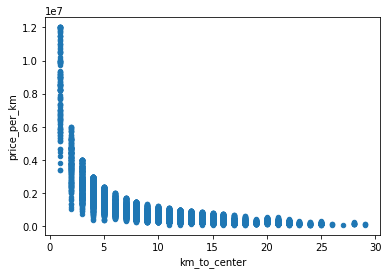

In [274]:
#график зависомости цены за км от удаленности на каждый км
spb.plot(x='km_to_center', y='price_per_km', kind='scatter')
plt.show()

На графике видно, что зона, где график меняется сильно  - это примерно 5 км, значит это и есть центральная зона.

###  "Выделение сегмента квартир в центре. Анализ параметров: площадь, цена, число комнат, высота потолков."

In [296]:
#выделила сегмент квартир в центре, посчитала кол-во
flats_in_center = spb.query('km_to_center <= 5')
len(flats_in_center)

2828

In [276]:
#изучим все столбцы выборки квартир в центре 
flats_in_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,price_square_meter,day_exposition,month_exposition,year_exposition,total_area_ratio,kitchen_area_ratio,km_to_center,price_per_km
count,2828.000000,2.828000e+03,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,...,2039.000000,2828.000000,2.828000e+03,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,1.866000e+03
mean,10.198020,1.505458e+07,95.965668,2.947666,2.988016,6.634371,55.093280,3.970297,14.364799,0.282178,...,457.696910,244.749840,1.435488e+05,2.468883,6.419378,2017.153819,0.577747,0.171198,3.492928,inf
std,6.024391,2.550563e+07,60.748059,1.507000,0.804828,3.500464,37.746283,2.750020,8.857023,0.713908,...,276.778365,259.756867,9.569681e+04,1.705633,3.471579,1.130984,0.150090,0.090075,1.372948,NaN
min,0.000000,1.600000e+06,12.000000,0.000000,2.400000,2.000000,3.000000,1.000000,2.000000,0.000000,...,22.000000,3.000000,1.534527e+04,0.000000,1.000000,2014.000000,0.021583,0.025381,0.000000,3.600000e+05
25%,6.000000,6.900000e+06,60.000000,2.000000,2.650000,5.000000,34.000000,2.000000,9.800000,0.000000,...,214.500000,74.000000,9.865806e+04,1.000000,3.000000,2017.000000,0.500000,0.112690,3.000000,1.560000e+06
50%,10.000000,9.473000e+06,81.900000,3.000000,2.900000,5.000000,45.000000,3.000000,11.500000,0.000000,...,444.000000,180.888634,1.219286e+05,2.000000,6.000000,2017.000000,0.594348,0.147607,4.000000,2.100000e+06
75%,15.000000,1.450875e+07,112.775000,4.000000,3.200000,7.000000,67.000000,5.000000,16.500000,0.000000,...,667.000000,303.000000,1.546460e+05,4.000000,10.000000,2018.000000,0.666667,0.201681,5.000000,2.964167e+06
max,50.000000,7.630000e+08,631.200000,19.000000,32.000000,25.000000,409.000000,25.000000,107.000000,5.000000,...,1293.000000,1572.000000,1.907500e+06,6.000000,12.000000,2019.000000,2.650604,0.880817,5.000000,inf


(0, 200)

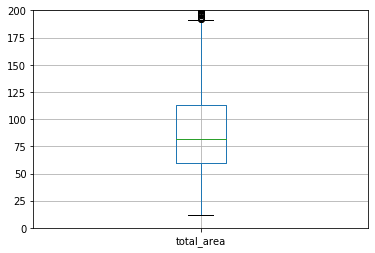

In [277]:
#изучим площадь
flats_in_center.boxplot('total_area')
plt.ylim(0, 200)
#видим, что границы ящика с усами находятся в диапазоне от 12 до 190 кв. м.

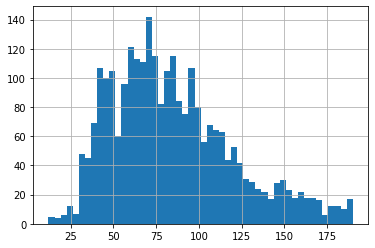

In [278]:
#построим гистограмму без выбросов
total_area_query_center = flats_in_center.query('total_area >= 12 and total_area <= 190')
total_area_query_center['total_area'].hist(bins=50)

(1000000.0, 30000000.0)

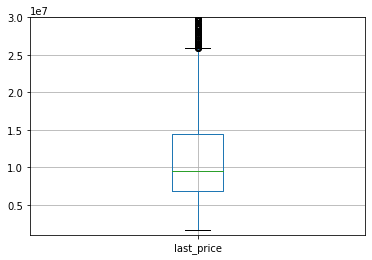

In [84]:
#изучим цену 
flats_in_center.boxplot('last_price')
plt.ylim(1e+06, 3.0e+07)
#видим, что границы ящика с усами находятся в диапазоне от 1.6e+06 до 2.6e+07

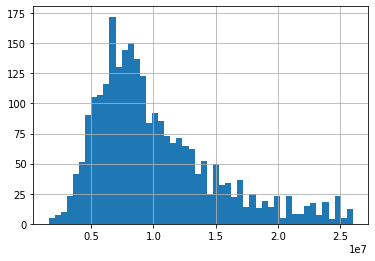

In [282]:
#построим гистограмму без выбросов
price_query_center = flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07')
price_query_center['last_price'].hist(bins=50)

(-1, 9)

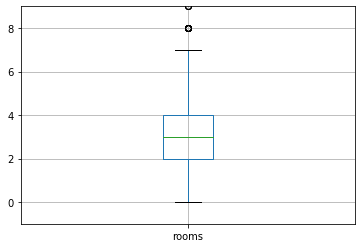

In [91]:
#изучим число комнат
flats_in_center.boxplot('rooms')
plt.ylim(-1, 9)
#видим, что границы ящика с усами находятся в диапазоне от 0 до 7 комнат, но значение 0 уберем, 
#так как даже квартира студия имеет 1 комнату

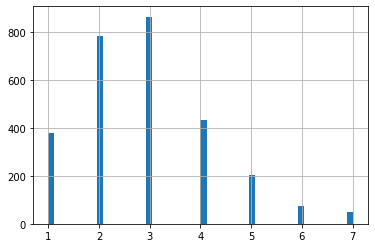

In [279]:
#построим гистограмму без выбросов
rooms_query_center = flats_in_center.query('rooms >= 1 and rooms <= 7')
rooms_query_center['rooms'].hist(bins=50)

(2, 4)

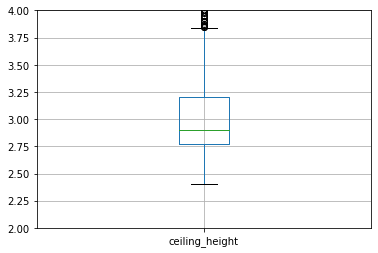

In [98]:
#изучим высоту потолков
flats_in_center.boxplot('ceiling_height')
plt.ylim(2, 4)
#видим, что границы ящика с усами находятся в диапазоне от 2.4 до 3.9 метров

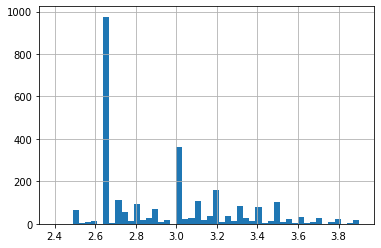

In [280]:
#построим гистограмму без выбросов
ceiling_height_query_center = flats_in_center.query('ceiling_height >= 2.4 and ceiling_height <= 3.9')
ceiling_height_query_center['ceiling_height'].hist(bins=50)

видим, что самая часто встречающаяся высота потолка это 2.8 м

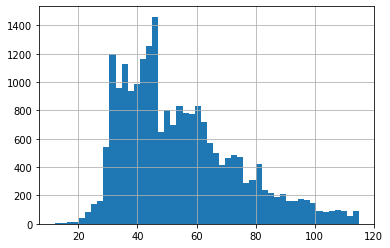

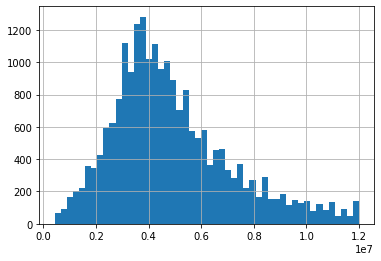

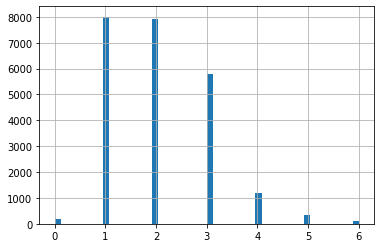

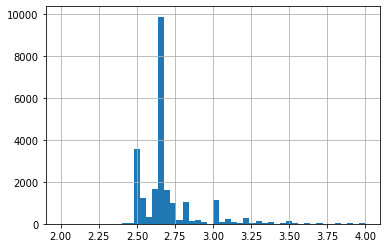

In [283]:
col_list2 = ['total_area', 'last_price', 'rooms', 'ceiling_height']
query_list_center = [total_area_query_center, price_query_center, rooms_query_center, ceiling_height_query_center]
for query, column in zip(query_list, col_list):
    query[column].hist(bins=50)
    plt.show()

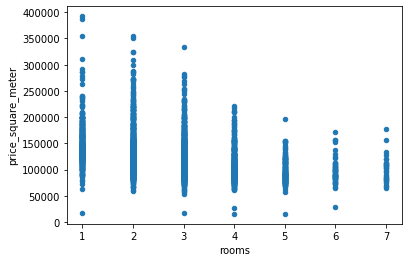

In [297]:
#зависимость кол-ва комнат от цены
flats_in_center.query('rooms >= 1 and rooms <= 7 and last_price >= 1.6e+06 and last_price <= 2.6e+07').plot(x='rooms', y='price_square_meter', kind='scatter')
plt.show()

In [286]:
flats_in_center.query('rooms >= 1 and rooms <= 7 and last_price >= 1.6e+06 and last_price <= 2.6e+07')['price_square_meter'].corr(flats_in_center.query('rooms >= 1 and rooms <= 7 and last_price >= 1.6e+06 and last_price <= 2.6e+07')['rooms'])

-0.3587203707431193

In [111]:
#зависимость этажа от цены

flats_in_center[['floor_type', 'last_price']].query('last_price >= 1.6e+06 and last_price <= 2.6e+07').pivot_table(index='floor_type', values='last_price')

,last_price
floor_type,
другой,1.053400e+07
первый,7.860341e+06
последний,1.049567e+07


видим, что послежний и другие  этажи в центре стоят почти одинаково, при этом в сревнении с выборкой по всей области данные отличаются, так как там первый и последний этажи -  самые дешевые

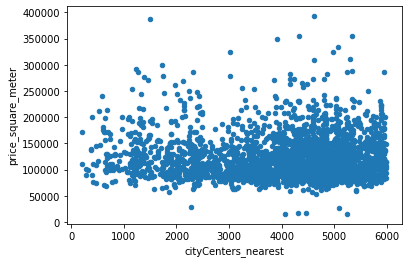

In [288]:
#зависимость удаленности от центра от цены
flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07').plot(x='cityCenters_nearest', y='price_square_meter', kind='scatter')
plt.show()

In [287]:
flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07')['price_square_meter'].corr(flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07')['cityCenters_nearest'])

0.025195813511622988

видно, что чем дальше от центра, тем больше плотность жилья, это нормально, ведь в центре в основном старые дома, где меньше квартир, плюс большАя часть помещений так же занята именно коммерческой сферой (офисы итд). при этом чем дальше от центра, тем число более дешевых квартир растет, это тоже может бвть связано с тем, что дальше от центра строят больше новостроек и соответствнно кол-во жилья больше и есть разная площадь(от сткдий до больших квартир) , поэтому такой разброс на графике

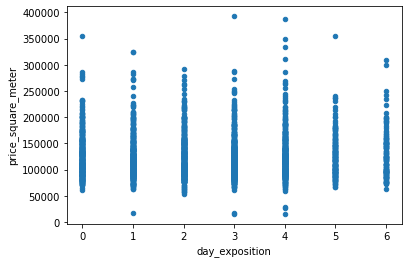

In [289]:
#зависомость даты размещения
#зависимость от дня
flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07').plot(x='day_exposition', y='price_square_meter', kind='scatter')
plt.show()

In [291]:
flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07')['day_exposition'].corr(flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07')['price_square_meter'])

0.009271210327749092

в будние дни размещают больше объявлений и за более высокую цену

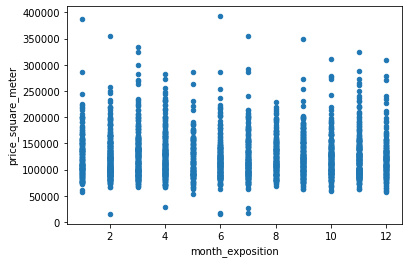

In [292]:
#зависимость от месяца
flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07').plot(x='month_exposition', y='price_square_meter', kind='scatter')
plt.show()

In [293]:
flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07')['month_exposition'].corr(flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07')['price_square_meter'])

-0.026768094371597082

болье всего квартир продается в начале, середине и конце года, в середине года цена ниже

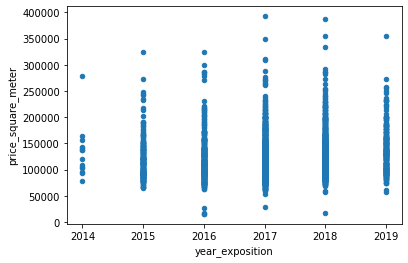

In [295]:
#зависимость от года
flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07').plot(x='year_exposition', y='price_square_meter', kind='scatter')
plt.show()

In [294]:
flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07')['year_exposition'].corr(flats_in_center.query('last_price >= 1.6e+06 and last_price <= 2.6e+07')['price_square_meter'])

0.11030557297491252

в 2014 году было наименьшее кол-во объявлений, самое большое кол-во - в 2017  и 2018 годах


### Шаг 5. Общий вывод

В первую очередь я обработала тсходные данные: нашла пропуски, проанализировала откуда они могли появиться и как с этим можно справиться, заменила их на соответствующие значения либо удалила совсем.
Сделала категоризацию столбца этаж по трем категориям, это облегчит дальнейший анализ.
Изучила параметры, которые характеризуют недвижимость и вычислила выбросы, от которых следует избавиться.
Вычислила зависимость параметров квартиры от цены кв метра.
Выделила квартиры в центре Питера, они стоят дорого, но при этом самая большая стоимость за кв.метр зафиксирована в поселке Лисий нос (загуглила фото поселка - не удивительно)
Ближе к центру города цены растут, это обусловлено старыми зданиями, где меньше квартир из-за малой этажности и занятости многих пространств не жилыми помещениями, а офисами, магазинами итп.
Выявила радиус центра города - это 5 км. В этом диапазоне так же провела исследования зависимости параметров квартиры от цены за кв метр. послежний и другие этажи в центре стоят почти одинаково, при этом в сревнении с выборкой по всей области данные отличаются, так как там первый и последний этажи - самые дешевые. Это обусловлено тем, что в центре ценится высокий этаж из-за красивого вида на город.
Факторы, котрые больше всего влияют на  стоимость квартир: общая площадь, кол-во комнат, этаж, близость к центру